In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import random

In [2]:
# Read the data file
df = pd.read_csv('Spotify data_5748010.csv')

In [3]:
df.head()

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009,2022/02/17,140,81,61,-6,23,23,203,0,6,70,2010,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010,2022/02/17,138,89,68,-4,36,83,192,1,8,68,2010,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010,2022/02/17,95,48,84,-7,9,96,243,20,3,72,2010,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010,2022/02/17,93,87,66,-4,4,38,180,11,12,80,2010,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010,2022/02/17,104,85,69,-6,9,74,268,39,5,79,2010,Solo


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          1000 non-null   object
 1   artist         1000 non-null   object
 2   top genre      1000 non-null   object
 3   year released  1000 non-null   int64 
 4   added          1000 non-null   object
 5   bpm            1000 non-null   int64 
 6   nrgy           1000 non-null   int64 
 7   dnce           1000 non-null   int64 
 8   dB             1000 non-null   int64 
 9   live           1000 non-null   int64 
 10  val            1000 non-null   int64 
 11  dur            1000 non-null   int64 
 12  acous          1000 non-null   int64 
 13  spch           1000 non-null   int64 
 14  pop            1000 non-null   int64 
 15  top year       1000 non-null   int64 
 16  artist type    1000 non-null   object
dtypes: int64(12), object(5)
memory usage: 132.9+ KB


In [5]:
# Convert 'added' column to datetime
df['added'] = pd.to_datetime(df['added'], format='%Y/%m/%d')
print(df.columns)

Index(['title', 'artist', 'top genre', 'year released', 'added', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop', 'top year',
       'artist type'],
      dtype='object')


# 1. Number of files submitted for the month of March

In [6]:
def march_submissions():
    march_data = df[df['added'].dt.month == 3]
    return len(march_data)

print(march_submissions())

3


# 2. Maximum duration for each year

    year released  max_duration
0            1975           354
1            2009           321
2            2010           308
3            2011           337
4            2012           350
5            2013           688
6            2014           323
7            2015           296
8            2016           348
9            2017           343
10           2018           418
11           2019           302
12           2020           240
13           2021           280


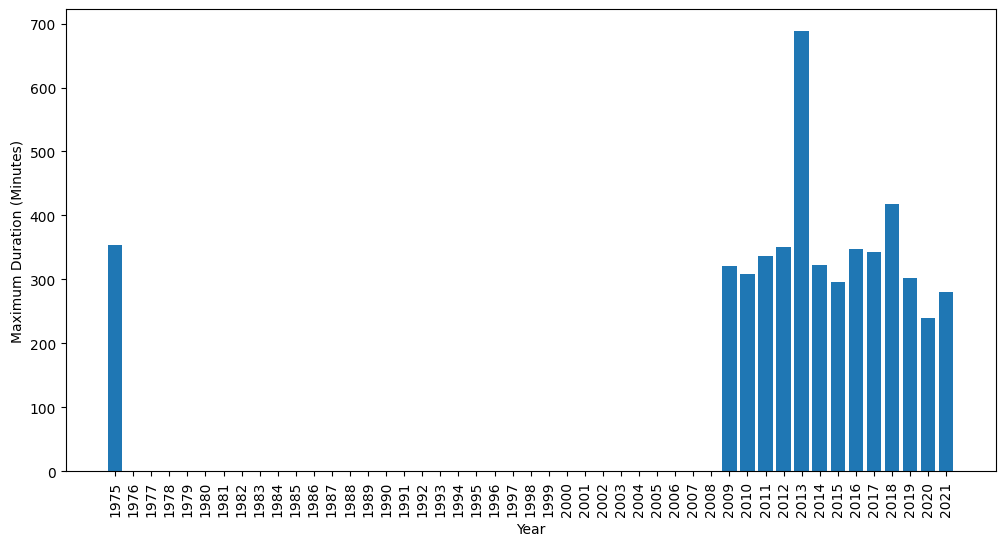

In [7]:
def max_duration_by_year():
    max_dur_df =  df.groupby('year released')['dur'].max().reset_index()
    max_dur_df = max_dur_df.rename(columns={'dur': 'max_duration'})
    from_year = df['year released'].min()
    to_year = df['year released'].max() + 1
    

    plt.figure(figsize=(12, 6))
    plt.bar(max_dur_df['year released'],
           max_dur_df['max_duration'])
    #plt.grid(True, color='black', linestyle='--', axis='both')
    plt.xlabel("Year")
    plt.xticks(np.arange(from_year, to_year, 1), rotation=90)
    plt.ylabel("Maximum Duration (Minutes)")
    
    plt.show
    
    return max_dur_df

print(max_duration_by_year())

# 3. Number of songs released for each artist for all years

In [8]:
def songs_by_artist():
    count_df = df.groupby('artist')['title'].count().sort_values(ascending=False).reset_index()
    count_df = count_df.rename(columns={'title': 'songs_released'})
    return count_df

print(songs_by_artist())

                   artist  songs_released
0            Taylor Swift              21
1                   Drake              18
2           Calvin Harris              18
3                 Rihanna              14
4           Ariana Grande              14
..                    ...             ...
439             Tom Odell               1
440          Travie McCoy               1
441           Troye Sivan               1
442     Twenty One Pilots               1
443  Two Door Cinema Club               1

[444 rows x 2 columns]


# 4. Number of songs released for each artist in 2010

In [9]:
def songs_by_artist_2010():
    df_2010 = df[df['year released'] == 2010]
    count_by_artist = df_2010.groupby('artist')['title'].count().sort_values(ascending=False).reset_index()
    count_by_artist.rename(columns={'title': 'count'}, inplace=True)
    return count_by_artist

print(songs_by_artist_2010())

                  artist  count
0                  Kesha      6
1             Bruno Mars      5
2                Rihanna      5
3                  Usher      4
4           Jason Derulo      3
5                  B.o.B      3
6            Edward Maya      2
7        Black Eyed Peas      2
8         Ellie Goulding      2
9      Far East Movement      2
10            Katy Perry      2
11             Taio Cruz      2
12        The Band Perry      2
13              Ludacris      2
14          Tinie Tempah      2
15     Waka Flocka Flame      2
16          Taylor Swift      2
17   Swedish House Mafia      2
18              Maroon 5      2
19                Eminem      2
20                 Drake      2
21      Enrique Iglesias      2
22   Diddy - Dirty Money      1
23          David Guetta      1
24             DJ Khaled      1
25              DJ Fresh      1
26            Kanye West      1
27         Justin Bieber      1
28               Jeremih      1
29          Jason Aldean      1
30      

# 5. Number of songs released for each top genre in each year

In [10]:
def songs_by_genre_year():
    genre_year_pivot = df.pivot_table(index='year released', columns='top genre', values='title', aggfunc='count', fill_value=0)
    print(df.groupby(['year released', 'top genre'])['title'].count().reset_index(name='count'))
    return genre_year_pivot

print(songs_by_genre_year())

     year released      top genre  count
0             1975   classic rock      1
1             2009        art pop      3
2             2009  barbadian pop      2
3             2009       big room      2
4             2009      dance pop     10
..             ...            ...    ...
331           2020       boy band      1
332           2020      dance pop      2
333           2021          alt z      1
334           2021        art pop      1
335           2021          grime      1

[336 rows x 3 columns]
top genre      acoustic pop  adult standards  afro dancehall  afrofuturism  \
year released                                                                
1975                      0                0               0             0   
2009                      0                0               0             0   
2010                      1                0               0             0   
2011                      0                0               0             0   
2012            

# Plot 1: Number of songs added by month & year

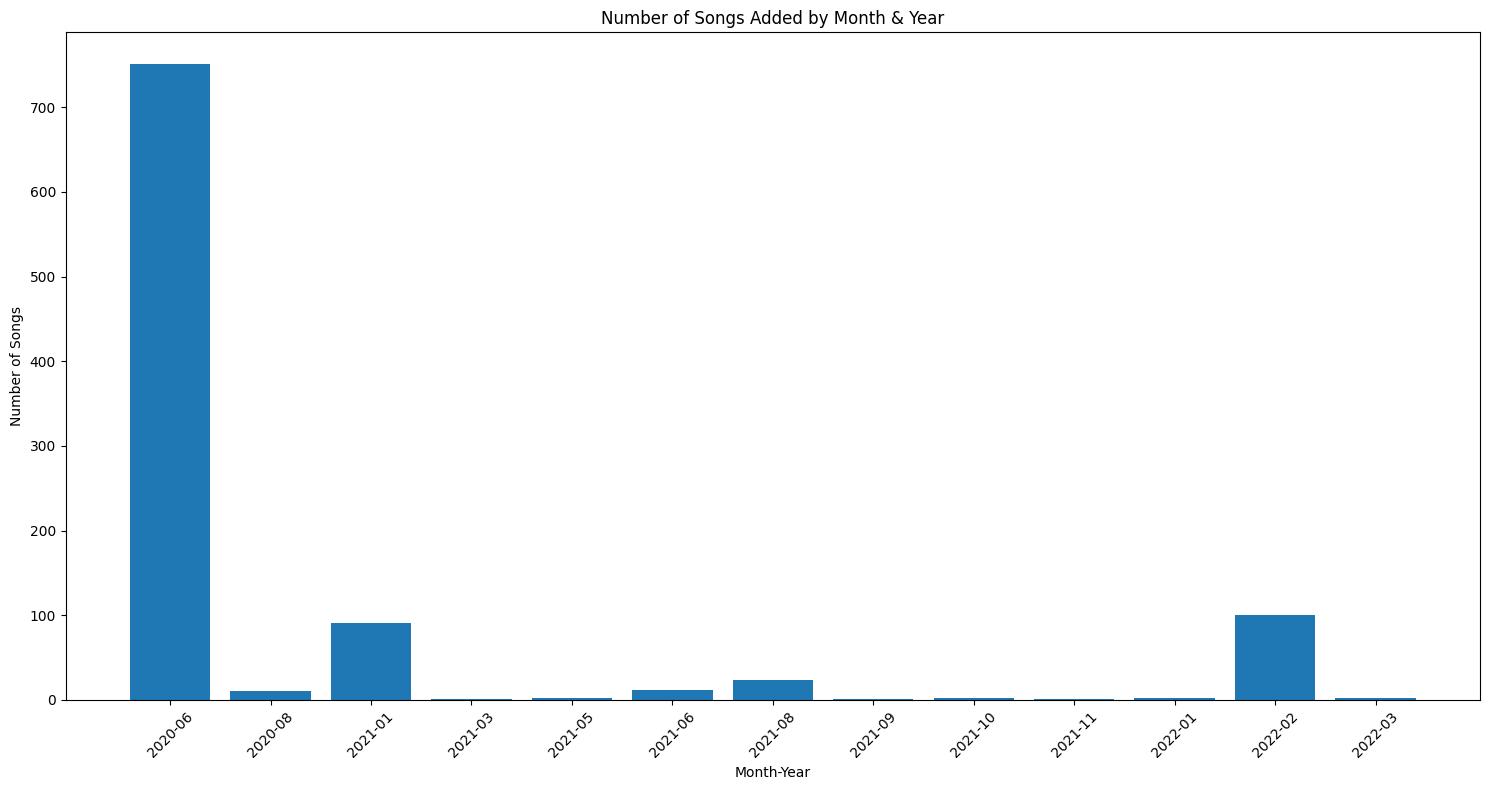

None


In [11]:
def plot_songs_by_month_year():
    plt.figure(figsize=(15, 8))
    df['year_month'] = df['added'].dt.to_period('M')
    monthly_counts = df.groupby('year_month').size()

    plt.bar(monthly_counts.index.astype(str), monthly_counts.values)
    plt.xticks(rotation=45)
    plt.title('Number of Songs Added by Month & Year')
    plt.xlabel('Month-Year')
    plt.ylabel('Number of Songs')
    plt.tight_layout()
    plt.show()
    
print(plot_songs_by_month_year())

# Plot 2: Line graph of songs by top genre for all years

132


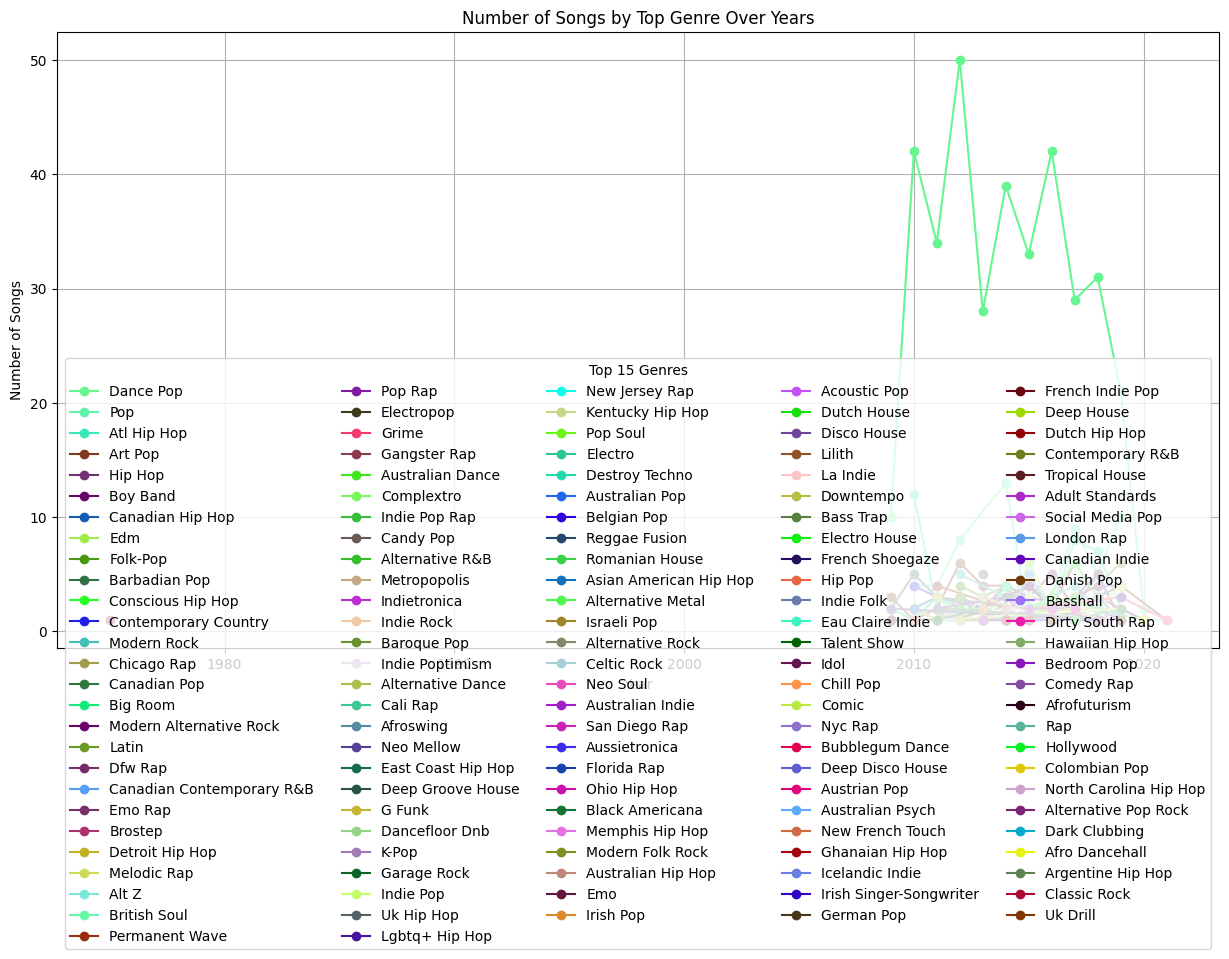

In [15]:
def plot_genre_trends(top_n=0): # pass a number to the function to determine the number of genres plotted
    # fig, axes = plt.subplots(2, 1, figsize=(15, 15))
    fig = plt.figure(figsize=(15, 8))
    ax = fig.gca()
    
    genre_year_counts = df.groupby(['year released', 'top genre']).size().reset_index(name='count')
    
    # Get the top genres based on the provided top_n value
    if top_n == 0:
        top_genres = df['top genre'].value_counts().index
    else:
        top_genres = df['top genre'].value_counts().index
        print(len(top_genres))

    # Calculate the total count for each genre across all years
    genre_total_counts = df.groupby('top genre').size().sort_values(ascending=False)
    # Filter the total counts by top_n genres (if top_n is specified)
    if top_n > 0:
        genre_total_counts = genre_total_counts[top_genres]

    # Plot the trend for each genre in the first subplot
    for genre in top_genres:
        genre_data = genre_year_counts[genre_year_counts['top genre'] == genre]
        label = str(genre).title() # capitalize first letter of genres
        
        random_color = '#{:06x}'.format(random.randint(0, 0xFFFFFF)) # use random package to pass a random hex color for each genre
        ax.plot(genre_data['year released'], genre_data['count'], label=label, marker='o', color=random_color)
      
    ax.set_title('Number of Songs by Top Genre Over Years')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Songs')
    ax.grid(True) 
    
    ax.legend(title=f'Top {top_n} Genres' if top_n else 'Top Genres', loc='lower center', ncols=5, bbox_to_anchor=(0.5, -0.5))
    
plot_genre_trends(15)

In [14]:
def plot_genre_trends(top_n=0):
    # Create a 1x2 subplot grid (2 plots side by side)
     = plt.subplots(1, 2, figsize=(20, 8))

    # Get the count of songs per genre by year
    genre_year_counts = df.groupby(['year released', 'top genre']).size().reset_index(name='count')

    # Get the top genres based on the provided top_n value
    if top_n == 0:
        top_genres = df['top genre'].value_counts().index
    else:
        top_genres = df['top genre'].value_counts().nlargest(top_n).index

    # Calculate the total count for each genre across all years
    genre_total_counts = df.groupby('top genre').size().sort_values(ascending=False)

    # Filter the total counts by top_n genres (if top_n is specified)
    if top_n > 0:
        genre_total_counts = genre_total_counts[top_genres]

    # Print the total counts for each genre
    print(f"Total count of songs for each genre across all years (limited to {top_n}):")
    print(genre_total_counts)
    print("\n")  # For better readability

    # Plot the trend for each genre in the first subplot
    for genre in top_genres:
        genre_data = genre_year_counts[genre_year_counts['top genre'] == genre]
        label = str(genre).title() # capitalize first letter of genres
        axes[0].plot(genre_data['year released'], genre_data['count'], label=label, marker='o')

    axes[0].set_title('Number of Songs by Top Genre Over Years')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Number of Songs')
    axes[0].legend(title=f'Top {top_n} Genres' if top_n else 'Top Genres')
    axes[0].grid(True)

    # Plot the total count of songs for each genre in the second subplot
    # genre_total_counts.plot(kind='bar', ax=axes[1], color='skyblue', edgecolor='black')
    # axes[1].set_title('Total Count of Songs by Genre')
    # axes[1].set_xlabel(f'Top Genre {top_n}')
    # axes[1].set_ylabel('Total Number of Songs')
    # axes[1].tick_params(axis='x', rotation=15)
    # axes[1].grid(True)

    # Adjust layout to avoid overlap
    plt.tight_layout()
    plt.show()
plot_genre_trends(20)

IndentationError: unindent does not match any outer indentation level (<string>, line 6)

In [ ]:
# Executing the functions
print("1. Number of files submitted in March:", march_submissions())

1. Number of files submitted in March: 3


2. Maximum duration for each year:
    year released  dur
0            1975  354
1            2009  321
2            2010  308
3            2011  337
4            2012  350
5            2013  688
6            2014  323
7            2015  296
8            2016  348
9            2017  343
10           2018  418
11           2019  302
12           2020  240
13           2021  280


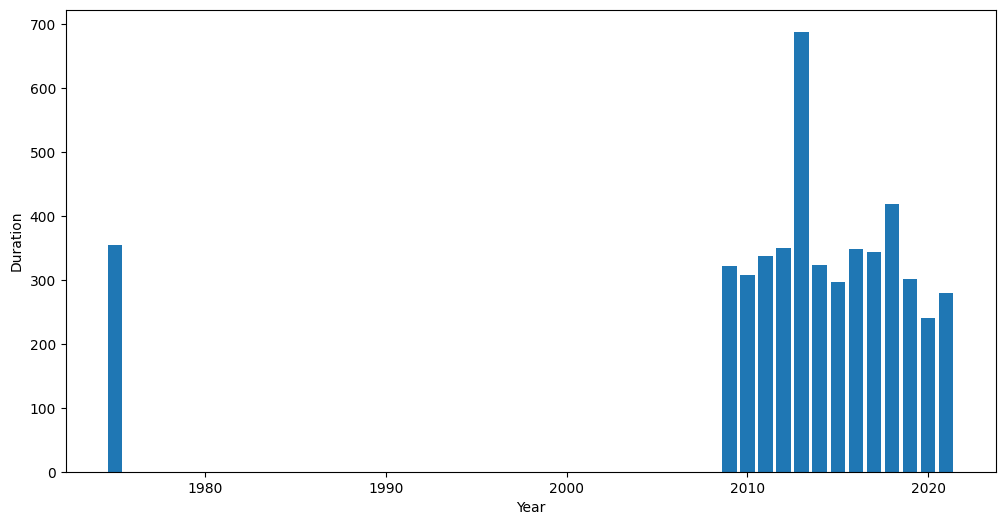

In [ ]:
print("2. Maximum duration for each year:")
print(max_duration_by_year())

In [ ]:
print("3. Number of songs released for each artist for all years")
print(songs_by_artist())

3. Number of songs released for each artist for all years
                   artist  title
0            Taylor Swift     21
1                   Drake     18
2           Calvin Harris     18
3                 Rihanna     14
4           Ariana Grande     14
..                    ...    ...
439             Tom Odell      1
440          Travie McCoy      1
441           Troye Sivan      1
442     Twenty One Pilots      1
443  Two Door Cinema Club      1

[444 rows x 2 columns]


In [ ]:
print("4. Number of songs released for each artist in 2010")
print(songs_by_artist_2010())

4. Number of songs released for each artist in 2010
                  artist  count
0                  Kesha      6
1             Bruno Mars      5
2                Rihanna      5
3                  Usher      4
4           Jason Derulo      3
5                  B.o.B      3
6            Edward Maya      2
7        Black Eyed Peas      2
8         Ellie Goulding      2
9      Far East Movement      2
10            Katy Perry      2
11             Taio Cruz      2
12        The Band Perry      2
13              Ludacris      2
14          Tinie Tempah      2
15     Waka Flocka Flame      2
16          Taylor Swift      2
17   Swedish House Mafia      2
18              Maroon 5      2
19                Eminem      2
20                 Drake      2
21      Enrique Iglesias      2
22   Diddy - Dirty Money      1
23          David Guetta      1
24             DJ Khaled      1
25              DJ Fresh      1
26            Kanye West      1
27         Justin Bieber      1
28               Jer

In [ ]:
print("5. Number of songs by genre and year:")
songs_by_genre_year()

5. Number of songs by genre and year:
     year released      top genre  count
0             1975   classic rock      1
1             2009        art pop      3
2             2009  barbadian pop      2
3             2009       big room      2
4             2009      dance pop     10
..             ...            ...    ...
331           2020       boy band      1
332           2020      dance pop      2
333           2021          alt z      1
334           2021        art pop      1
335           2021          grime      1

[336 rows x 3 columns]


top genre,acoustic pop,adult standards,afro dancehall,afrofuturism,afroswing,alt z,alternative dance,alternative metal,alternative pop rock,alternative r&b,...,pop soul,rap,reggae fusion,romanian house,san diego rap,social media pop,talent show,tropical house,uk drill,uk hip hop
year released,,,,,,,,,,,,,,,,,,,,,
1975,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2009,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2010,1,0,0,0,0,0,0,0,0,0,...,1,0,0,2,0,0,0,0,0,0
2011,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,2
2012,0,0,0,0,0,0,1,1,0,2,...,0,0,0,0,0,0,0,0,0,0
2013,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2014,0,0,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0
2015,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016,0,0,0,0,0,3,0,0,0,2,...,0,0,0,0,2,0,0,0,0,0


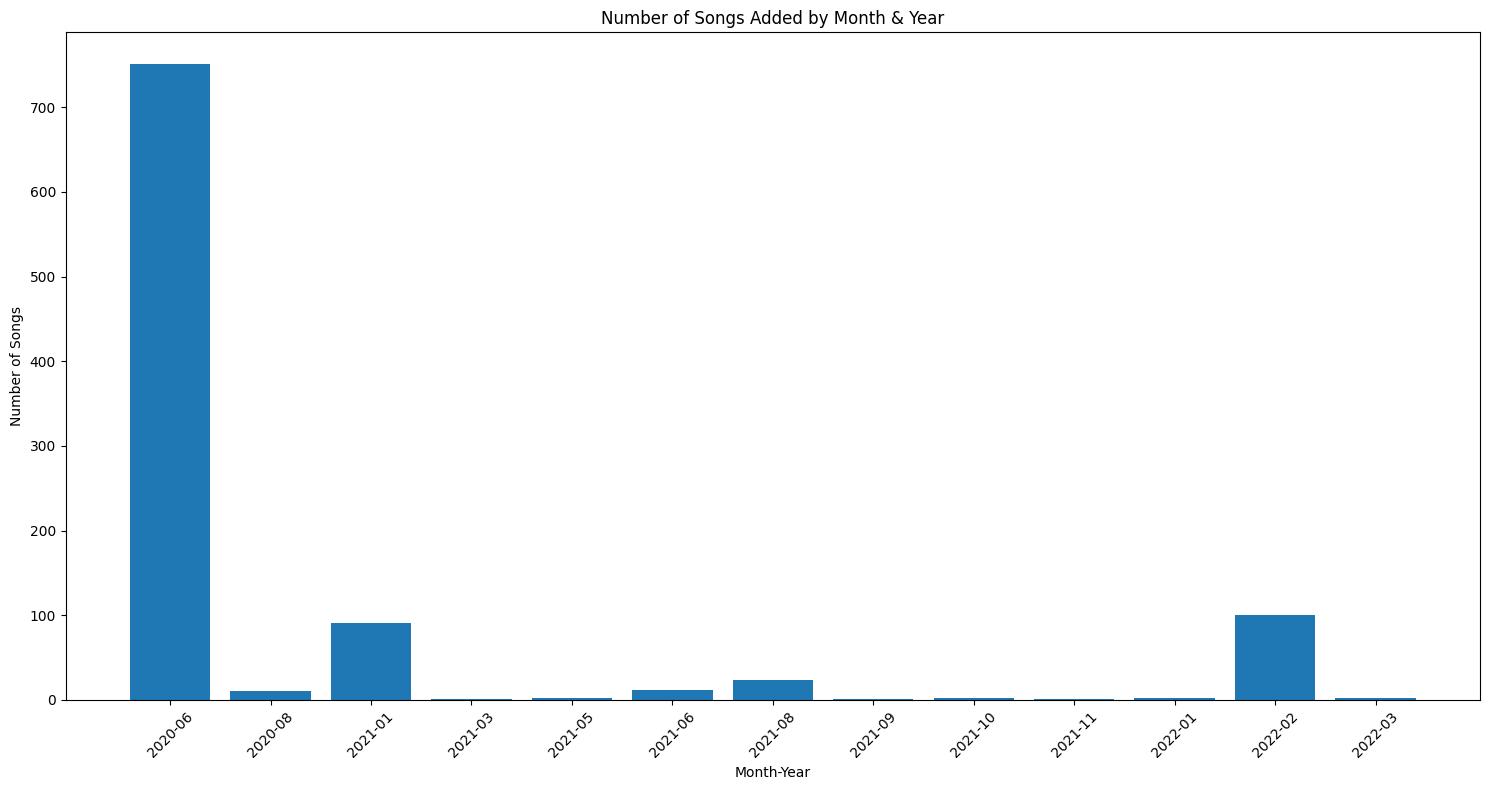

In [ ]:
# Create visualizations
plot_songs_by_month_year()

Total count of songs for each genre across all years (limited to 10):
top genre
dance pop           361
pop                  57
atl hip hop          39
art pop              37
hip hop              21
boy band             21
canadian hip hop     18
edm                  17
folk-pop             15
barbadian pop        14
dtype: int64




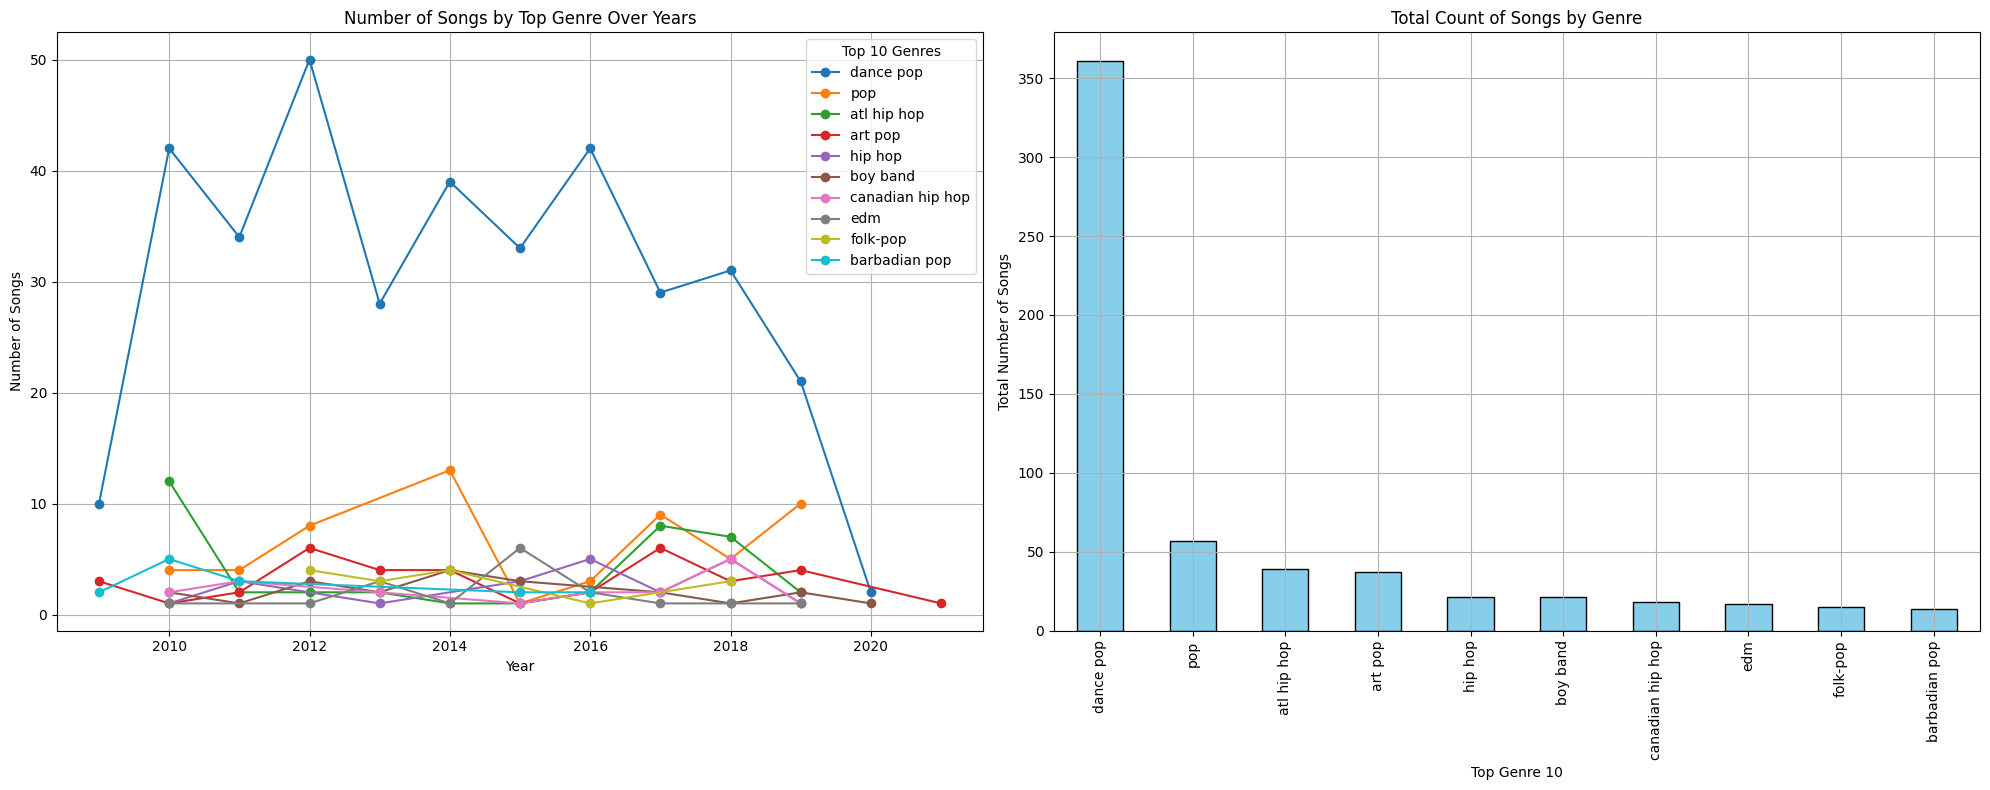

In [ ]:
plot_genre_trends(10)